# Computational Complexity

## Introduction


To get started, let's take a look at the following code. How long will it take to run?

In [ ]:
def find_element(array, x):
    for i, y in enumerate(array):
        if x == y:
            return i

    return -1


More precisely, how long will it take to run in the worst-case scenario?

This code will run slower if:
- your computer is old,
- the array is longer, or
- $x$ happens to be closer to the end of the array, or not present at all.


How can we formalize these insights? We'll have to get rid of ambiguous stuff like "old computers".

1. First, let's consider an abstract computer in which all "atomic" operations take exactly $1$ unit of time. Defining exactly what's an "atomic" operation is not trivial. For now, let's assume it's things like arithmetics operations, indexing in a list, and invocating functions.

2. Second, we'll count the number of operations *with respect to* the size of an arbitrary array, We'll say something like "This will cost 2 units of time per each element of the array."

3. And Finally, we'll consider the worst-case scenario. So we assume, in this example, that the element $x$ is not in the array. More generally, we will always think about the maximum number of operations that our algorithm could potentially perform.

With these ideas in mind, we are ready to define the *algorithmic complexity* for this code.
Let's count how many operations are performed in each step, while assuming our array has length $n$.

In [ ]:
def find_element(array, x):
    # performed n times
    for i, y in enumerate(array): # +1 invocation for interating to the next element
                                  # +1 tuple deconstruction
        if x == y:                # +1 comparison
            return i              # +1 return

    return -1                     # +1 return

Depending on how detailed we would like to be, we could say that we have around $4n + 1$ operations in the worst-case scenario.

Why do we care about this?
The reason is that now we can compare different algorithms.

For example, if your implementation takes $5n + 3$ operations to run, then it is worse, right?

Well, not necessarily!
We have been assuming that all "atomic" operations are equally costly, but this is not true.
It makes no sense to compare my implementation with your implementation by looking at those tiny differences. My $5n$ could be faster than your $3n$ if my "atomic" operations are simpler.

We want a measure of complexity that vanishes all implementation details.
To achieve this, we will take away everything unimportant when $n$ becomes very large. We will consider that:

- $n + a$ and $n + b$ are the same
- $a\cdot n$ and $b\cdot n$ are the same

for finite constant values $a$ and $b$.

Then, instead of saying $3n + 4$, we will say that the *asymptotic algorithmic complexity* is $\mathcal{O}(n)$ -and we read it like "Oh of n" or something like that. This is the so-called big-O notation.


We say $\mathcal{O}(n)$ means "linear complexity" because the number of operations grows linearly *with respect to* the size of the array.
Formally, it means that your function's cost is bounded by a linear function.
Intuitively, what this means is that in the long run, small differences like specific operations matter less than the ability that your algorithm has to *scale* with more data. And the reason is simple, an algorithm with a lower asymptotic complexity will eventually win.


Let's consider for example the binary search algorithm. It has $\mathcal{O}(\log n)$ complexity.

In [ ]:
def binary_search(arr, x):
    l = 0
    r = len(arr) - 1
    while l < r:
        m = (l + r) // 2
        if arr[m] < x:
            l = m + 1
        else:
            r = m 
    if arr[l] == x:
        return l
    return None

Why?

Well, a simple reasoning is that it's dividing the length of the search range by 2 each time. So, if the current range has length is $\mathcal{O}(2^t)$, it's transformed into a range of length $\mathcal{O}(2^{t-1})$, and then into one of length $\mathcal{O}(2^{t-2})$ and so on until reaching $\mathcal{O}(2^{t-t}) = 1$.

Thus, if the length of the array is $n = \mathcal{O}(2^t)$, it takes $t = \mathcal{O}(\log n)$ iterations of the binary search to converge.

In the other side, a linear search algorithm is something like this:

In [ ]:
def linear_search(arr, x):
    for i in range(len(arr)):
        if arr[i] == x:
            return i
    return None 


The Binary search is doing more work in each iteration than the linear search. It could be $20 \log n$ vs $3 n$. With small arrays, probably the linear search will perform better than the binary search, but there's a value of $n$ after which binary search will win, regardless of implementation details.


This means that, if you have an $\mathcal{O}(n^2)$ implementation of some algorithm, even if it's on C-language and runs in a supercomputer while mine is pure JavaScript and runs in the browser but it's $\mathcal{O}(n \cdot \log n)$, there's an input size $n$ after which mine will be faster.



So, the time complexity of a loop estimates the number of times the code inside the loop is executed. For example, the time complexity of the following code is $\mathcal{O}(n)$, because the code inside the loop is executed $n$ times.

```Python
for i in range(n):
    ...
```

The time complexity of the following code is $\mathcal{O}(n^2)$
```Python
for i in range(n):
    for j in range(n):
        ...
```


In general, if there are $k$ nested loops and each loops goes through $n$ values, the time complexity is $\mathcal{O}(n^k)$, by simple multiplication principle.

Again, the time complexity doesn't tell us the exact number of operations, because it only shows the order of growth and ignores the constant factors. So, the following codes all have $\mathcal{O}(n)$ complexity.


```Python
for i in range(3*n):
    ...

for i in range(n + 5):
    ...

for i in range(0, n, 2):
    ...
```

The following code has $\mathcal{O}(n^2)$ complexity, because the code inside the inner loop is exectued $1 + 2 + \dots + n = \frac{n(n + 1)}{2} = \frac{n^2 + n}{2}$.

```Python

for i in range(1, n + 1):
    for j in range(i):
        ...
```

If an algorithm consists of consecutives phases, the total time complexity is the largest of all single phases. The reason is that the slowst is the bottleneck of the algorithm. For example, the following code consists of 3 phases with complexities $\mathcal{O}(n)$, $\mathcal{O}(n^2)$ and $\mathcal{O}(n)$, and the total complexity is $\mathcal{O}(n^2)$.
```Python
for i in range(n):
    ...
for i in range(n):
    for j in range(n):
        ...
for i in range(n):
    ...
```

Sometimes the complexity depends on several factors, and then the formula will contain several variables. For example, the time complexity of the following code is $\mathcal{O}(n m)$.
```Python
for i in range(n):
    for j in range(m):
        ...
```

### Note:

Analyzing recursive algorithm is a bit more tricky, and we'll see it during the lecture about recursion.


## Demo (Binary search vs. Linear Search)

In [ ]:
from timeit import default_timer as timer

arr = []

In [ ]:
def linear_search(x: int):
    '''
    Returns the position where x is, and returns None in case it doesn't exist in the array
    Time Complexity: O(n)
    '''
    for i in range(len(arr)):
        if arr[i] == x:
            return i 
    return None 

In [ ]:
def binary_search(x):
    '''
    Returns the position where x is, and returns None in case it doesn't exist in the array
    Time Complexity: O(log n)
    '''
    l = 0
    r = len(arr) - 1
    while l < r:
        mid = (l + r) // 2
        if arr[mid] < x:
            l = mid + 1
        else:
            r = mid 
    if arr[l] == x:
        return l
    return None

In [ ]:
for n in [10, 100, 1000, 10000, 100000, 10000000]:
    arr = [i for i in range(n)] # Creating a sorted array
    value = max(arr) + 1 # Value to search
    
    start = timer()
    linear_search(value)
    end_time = timer()
    print(f"Linear Search with n = {n}: {round(end_time - start, 6)}")

    start = timer()
    binary_search(value)
    end_time = timer()
    print(f"Binary Search with n = {n}: {round(end_time - start, 6)}")

    print()
    

### Trick:

Sometimes, it might be hard to understand what's the complexity of the code, but we can get a rough estimate of it somehow.

We can try several input of different sizes, and count how many operations more or less it does (my just having a `counter` variable and increasing it in every step), and then plot the graph of the value of `counter` for every given input.

In [1]:
! pip install matplotlib

  Using cached matplotlib-3.5.2-cp310-cp310-macosx_10_9_x86_64.whl (7.3 MB)
  Using cached kiwisolver-1.4.3-cp310-cp310-macosx_10_9_x86_64.whl (65 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.33.3-py3-none-any.whl (930 kB)


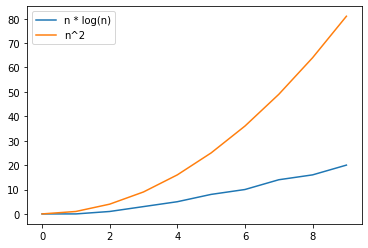

In [13]:
import matplotlib.pyplot as plt 

def f(n):
    count = 0
    for i in range(1, n):
        for j in range(i, n, i):
            count += 1
    return count 

x = [n for n in range(10)]
y = [f(n) for n in x]
z = [n*n  for n in x]

plt.plot(x, y, label = 'n * log(n)')
plt.plot(x, z, label = 'n^2')
plt.legend()

We'll see in the coming classes why the code shown has complexity $\mathcal{O}(n\log n)$